In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import io
#ruta = io.StringIO(uploaded['train.csv'].decode('utf-8'))
df = pd.read_csv('data/train.csv', dtype = {'piscina':'int32', 'gimnasio':'int32', 'usosmultiples':'int32', 'escuelascercanas':'int32',
                                         'centroscomercialescercanos':'int32', 'precio':'int32', 'id':'int32'},parse_dates = ['fecha'])

In [3]:
df.head(1)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23,0,0,0,0,0,2273000


In [4]:
#Quito todos los NaN y los pasa a valor 0
df = df.replace(np.nan, 0)

In [5]:
#Continuar casteando valores que ocupan demasiada memoria (ahora puedo hacerlo en aquellos que tenian NaN)
df = df.astype({'banos':'int32', 'antiguedad':'int32', 'garages':'int32', 'habitaciones':'int32', 'metroscubiertos':'int32', 'metrostotales':'int32',
                    'idzona':'int32'})

In [6]:
#Establecer como category el tipo de propiedad
categorias = df['tipodepropiedad']
categorias = categorias.astype('category').dtypes
df = df.astype({'tipodepropiedad':'category'})

In [7]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,0,2,1,...,23533,0.000000,0.000000,2015-08-23,0,0,0,0,0,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10,3,2,...,24514,19.310205,-99.227655,2013-06-28,0,0,0,1,1,3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5,3,2,...,48551,0.000000,0.000000,2015-10-17,0,0,0,0,0,1200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1,2,1,...,53666,19.301890,-99.688015,2012-03-09,0,0,0,1,1,650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10,2,1,...,47835,0.000000,0.000000,2016-06-07,0,0,0,0,0,1150000


# Analisis temporales
 La idea de este notbook es analizar todos los datos del dataframe de acuerdo a las fechas y ver qué cosas interesantes podemos observar, más alla de estudiar el comportamiento de los distintos features a través del tiempo.

In [8]:
df.fecha.min()

Timestamp('2012-01-01 00:00:00')

In [9]:
df.fecha.max()

Timestamp('2016-12-31 00:00:00')

## Comienzo analizando la variación de la cantidad de publicaciones a través del tiempo

Para esto lo primero que hago es crear nuevas columnas según el día, mes y año.

In [10]:
df.fecha.head()

0   2015-08-23
1   2013-06-28
2   2015-10-17
3   2012-03-09
4   2016-06-07
Name: fecha, dtype: datetime64[ns]

In [11]:
#Extraigo el año
df['anio'] = df.fecha.dt.year
df.anio.head()

0    2015
1    2013
2    2015
3    2012
4    2016
Name: anio, dtype: int64

In [12]:
#Extraigo el mes
df['mes'] = df.fecha.dt.month
df.mes.head()

0     8
1     6
2    10
3     3
4     6
Name: mes, dtype: int64

In [13]:
#Extraigo el día
df['dia'] = df.fecha.dt.day
df.dia.head()

0    23
1    28
2    17
3     9
4     7
Name: dia, dtype: int64

Cuento la cantidad de publicaciones realizadas según el año

In [52]:
dataXanio = df[['id', 'anio']].groupby('anio').agg('count').reset_index()
dataXanio.columns = ['año', 'cantidad_publicaciones']
dataXanio

,año,cantidad_publicaciones
0,2012,23534
1,2013,30386
2,2014,40572
3,2015,51470
4,2016,94038


In [53]:
dataXanio.dtypes

año                       int64
cantidad_publicaciones    int64
dtype: object

Text(0.5,0,'Año')

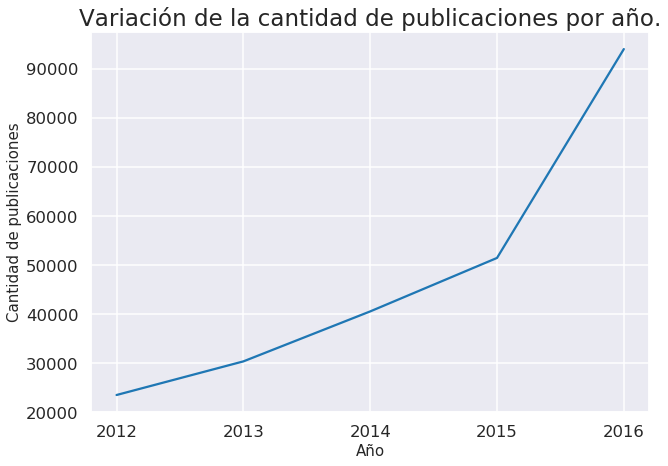

In [75]:
plt.figure(figsize = (10,7))
sns.set_style("darkgrid")
sns.set_context("talk")
pubsXanio = sns.lineplot(data = dataXanio, x = 'año', y = 'cantidad_publicaciones', palette = 'Set1')
pubsXanio.set_xticks([2012, 2013, 2014, 2015, 2016])
pubsXanio.set_title('Variación de la cantidad de publicaciones por año.', fontsize =  23)
pubsXanio.set_ylabel('Cantidad de publicaciones', fontsize = 15)
pubsXanio.set_xlabel('Año', fontsize = 15)

En el gráfico se aprecia que la cantidad de publicaciones siempre estuvo en alza desde el año 2012, que es donde comienzan nuestros datos, pero se observa, además, como a partir del 2015 la cantidad de publicaciones aumentó considerablemente y continuó en alza a partir de ahí.

## Veo de manera más detallada cómo varían las publicaciones según los meses del año

In [14]:
dataXmes = df[['id', 'anio', 'mes']].groupby(['anio', 'mes']).agg('count')
dataXmes = dataXmes.unstack(0)
dataXmes.columns = ['2012', '2013', '2014', '2015', '2016']

In [15]:
dataXmes.head()

,2012,2013,2014,2015,2016
mes,,,,,
1,1528,1993,2403,4310,5775
2,1327,1401,2534,3869,4592
3,1103,1734,2916,3957,5022
4,1434,1829,2780,3783,6640
5,1857,2000,3071,3696,5438


In [16]:
dataXmes = dataXmes.reset_index()
dataXmes.head()

,mes,2012,2013,2014,2015,2016
0,1,1528,1993,2403,4310,5775
1,2,1327,1401,2534,3869,4592
2,3,1103,1734,2916,3957,5022
3,4,1434,1829,2780,3783,6640
4,5,1857,2000,3071,3696,5438


Text(0.5,1.02,'Variación de la cantidad de publicaciones según el mes para cada año.')

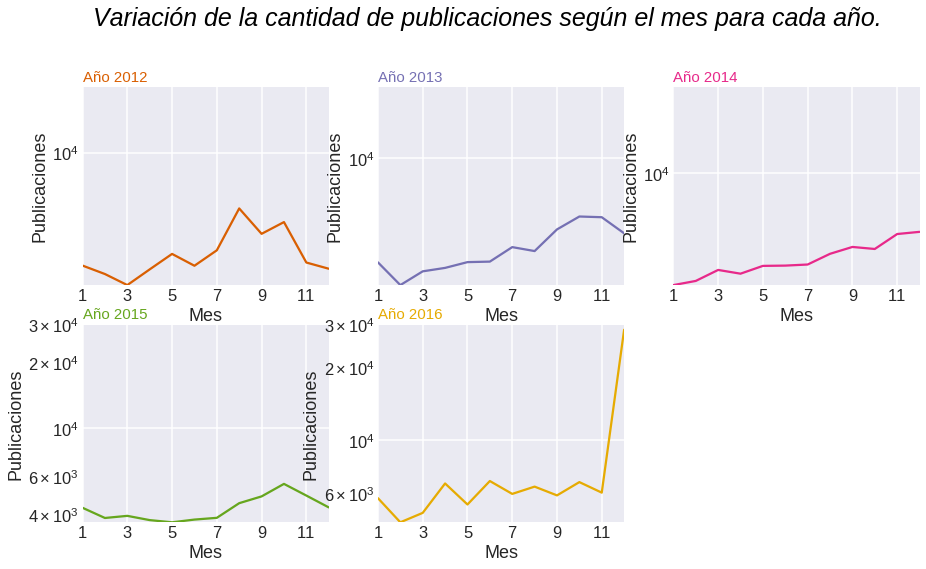

In [83]:
plt.figure(figsize = (15,8))
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')

for num, column in enumerate(dataXmes.drop('mes', axis=1)):
    
    num += 1
    plt.subplot(2,3, num)
    # Uso semilog para poder apreciar mejor el comportamiento de las lineas
    plt.semilogy(dataXmes['mes'], dataXmes[column], marker='', color=palette(num))
    #Todos los plots tienen los mismos límites
    plt.xlim(1,12)
    plt.ylim(0,30000)
    plt.xticks([1,3,5,7,9,11])
    # Título para cada plot
    plt.title("Año "+column, loc='left', fontsize=15, fontweight=0, color=palette(num))
    plt.xlabel('Mes')
    plt.ylabel('Publicaciones')
    
plt.suptitle("Variación de la cantidad de publicaciones según el mes para cada año.", fontsize = 25, fontweight=0, color='black', style='italic', y=1.02)
 

Algo muy curioso en este gráfico es el crecimiento en aumento de publicaciones que se registra a partir del mes de noviembre del año 2016, es algo que llama la atención así que haremos más análisis sobre esto más adelante.
Además es el único año que cierra al alza en las publicaciones, pues se observa que la tendencia en la mayoria de los años anteriores era la disminución de las publicaciones en los ultimos meses

## Pruebo una alternativa diferente

Text(0.5,1.02,'Variación de la cantidad de publicaciones según el mes para cada año.')

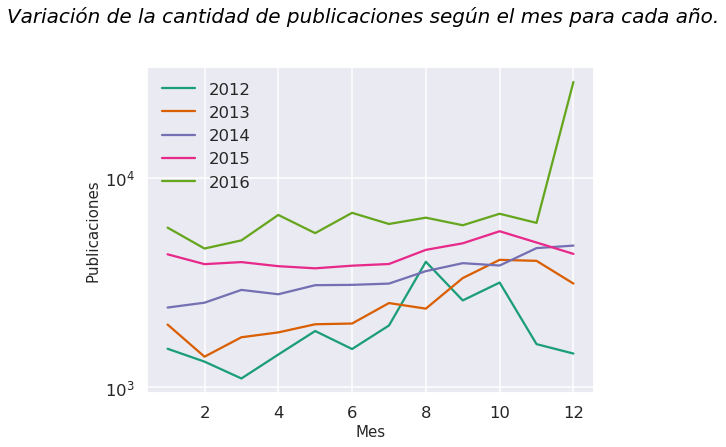

In [72]:
plt.figure(figsize = (8,6))
for i, j in  enumerate(dataXmes.iloc[:,1:].columns):
    plt.semilogy(dataXmes['mes'], dataXmes[j], marker='', color=palette(i))
plt.legend()
plt.xlabel('Mes', fontsize = 15)
plt.ylabel('Publicaciones', fontsize = 15)
plt.suptitle("Variación de la cantidad de publicaciones según el mes para cada año.", fontsize = 20, fontweight=0, color='black', style='italic', y=1.02)

## Veo con un poco más de detalle el comportamiento de las publicaciones por día para el mes de noviembre del 2016

In [50]:
data_nov_2016 = df.loc[(df.mes == 11) & (df.anio == 2016), ['id', 'dia']].groupby('dia').agg('count').reset_index()
data_nov_2016.head()

,dia,id
0,1,254
1,2,131
2,3,129
3,4,278
4,5,177


Text(0,0.5,'Publicaciones')

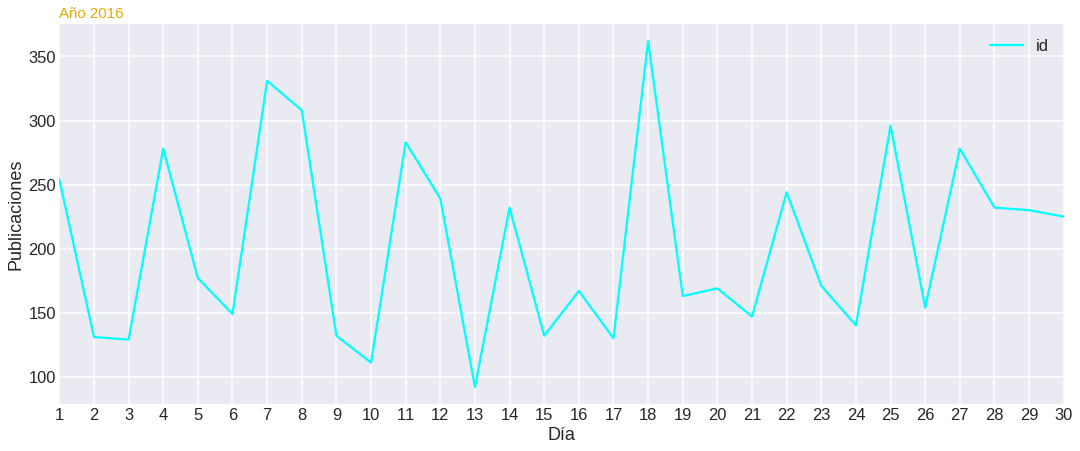

In [84]:
data_nov_2016.plot(x = 'dia', y = 'id', figsize = (18,7), xticks = list(range(1,31)), color = 'cyan')
plt.title("Año "+column, loc='left', fontsize=15, fontweight=0, color=palette(num))
plt.xlabel('Día')
plt.ylabel('Publicaciones')